<a href="https://colab.research.google.com/github/SJhawar1010/Quantum-Computing/blob/main/Satyam_554_QCProject_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install dwave-ocean-sdk networkx --quiet

In [19]:
from dwave.system import DWaveSampler, EmbeddingComposite
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
!dwave config create

Using the simplified configuration flow.
Try 'dwave config create --full' for more options.

Updating existing configuration file: /root/.config/dwave/dwave.conf
Available profiles: defaults
Updating existing profile: defaults
Solver API token [DEV-ba2620bc6b7c803e65aaf1c53f9ec58dde8ae289]: DEV-ba2620bc6b7c803e65aaf1c53f9ec58dde8ae289
Configuration saved.


In [ ]:
#DEV-ba2620bc6b7c803e65aaf1c53f9ec58dde8ae289

In [15]:
graph = nx.Graph()
graph.add_edges_from([(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4)])

In [16]:
print("Input Graph:")
print("Nodes:", graph.nodes)
print("Edges:", graph.edges)

Input Graph:
Nodes: [0, 1, 2, 3, 4]
Edges: [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4)]


In [17]:
nodes = list(graph.nodes)
qubo_matrix = np.zeros((len(nodes), len(nodes)))

for i in nodes:
    for j in nodes:
        if i == j:
            qubo_matrix[i][j] = 0
        elif graph.has_edge(i, j):
            qubo_matrix[i][j] = -1
        else:
            qubo_matrix[i][j] = 0

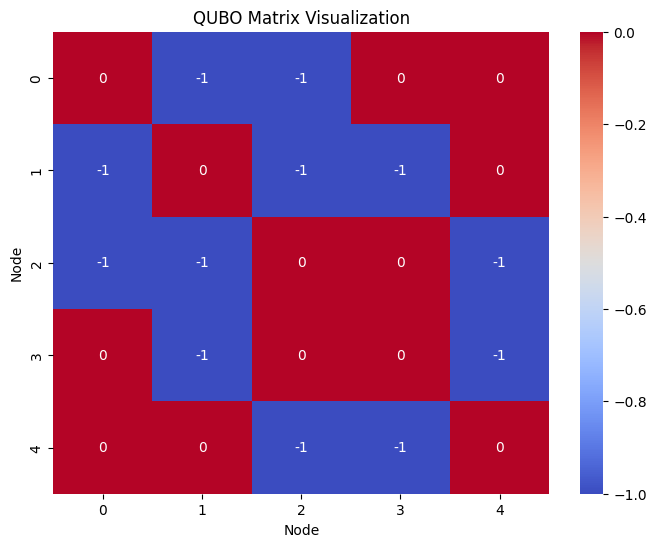

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(qubo_matrix, annot=True, cmap="coolwarm", xticklabels=nodes, yticklabels=nodes, cbar=True)
plt.title("QUBO Matrix Visualization")
plt.xlabel("Node")
plt.ylabel("Node")
plt.show()

Submitting problem to D-Wave system...

--- Quantum Annealing Results ---
Cut: [0, 1, 2, 3, 4]
Energy: -12.0


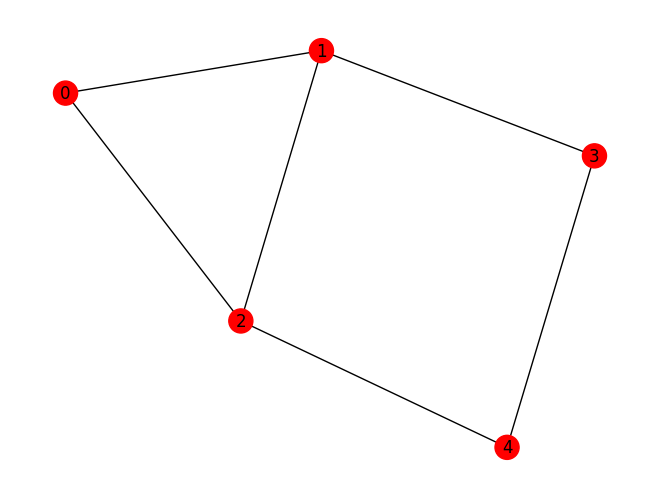

In [24]:
sampler = EmbeddingComposite(DWaveSampler())
print("Submitting problem to D-Wave system...")

try:
    sampleset = sampler.sample_qubo(qubo_matrix, num_reads=100)
    best_sample = sampleset.first.sample
    energy = sampleset.first.energy
    cut = [node for node in best_sample if best_sample[node] == 1]

    print("\n--- Quantum Annealing Results ---")
    print(f"Cut: {cut}")
    print(f"Energy: {energy}")

    # Visualize the graph and cut
    colors = ['red' if node in cut else 'blue' for node in graph.nodes]
    nx.draw(graph, with_labels=True, node_color=colors)
    plt.show()

except Exception as e:
    print(f"Error during quantum annealing: {e}")